# Введение

Исследование будет строится на данных опроса более 100 респондентов из Малайзии, которые посещают Starbucks. 

Данные содержат следующие характеристики об опрошенных:
* Социодемографические характеристики - возраст, пол, занятость, доход
* Характеристики текущего поведения респондентов в Starbucks 
* Факторы Starbucks, которые влияют на отношение респондентов

Выбранный датасет позволит выявить некоторые закономерности в потребительском поведении респондентов, а также
посмотреть, какие характеристики Starbucks наиболее важны для клиентов.

# Первичный анализ данных

Загрузим необходимые библиотеки python и выгрузим наш датасет.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import statsmodels.api as sm

In [6]:
survey = pd.read_csv('/Users/agamagomedova/Downloads/archive-3/Starbucks satisfactory survey.csv')

Оценим размер датасета, посмотрим на основные столбцы данных и, для удобства анализа, переименуем столбцы.

In [7]:
survey.shape

(122, 21)

In [8]:
survey.head(2)

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes


In [9]:
survey.rename(columns = {'Timestamp' : 'time', 
                         '1. Your Gender' : 'gender', 
                         '2. Your Age' : 'age', 
                         '3. Are you currently....?' : 'occupation', 
                         '4. What is your annual income?' : 'income',
                         '5. How often do you visit Starbucks?' : 'visits', 
                         '6. How do you usually enjoy Starbucks?' : 'takeaway',
                         '7. How much time do you normally spend during your visit?' : 'avgtime', 
                         "8. The nearest Starbucks's outlet to you is...?" : 'nearest', 
                         '9. Do you have Starbucks membership card?' : 'card', 
                         '10. What do you most frequently purchase at Starbucks?' : 'favourite',
                         '11. On average, how much would you spend at Starbucks per visit?' : 'bill', 
                         '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'quality',
                         '13. How would you rate the price range at Starbucks?' : 'price', 
                         '14. How important are sales and promotions in your purchase decision?' : 'promoeffect', 
                         '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'vibe', 
                         '16. You rate the WiFi quality at Starbucks as..' : 'wifi', 
                         '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'service', 
                         '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'choice', 
                         '19. How do you come to hear of promotions at Starbucks? Check all that apply.' : 'promosource', 
                         '20. Will you continue buying at Starbucks?' : 'intent'}, inplace = True) 

In [10]:
survey.head(10)

,time,gender,age,occupation,income,visits,takeaway,7. How much time do you normally spend during your visit?,nearest,card,...,bill,quality,price,promoeffect,vibe,wifi,service,choice,promosource,intent
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,Less than RM20,4,3,5,5,4,5,4,Social Media,Yes
6,2019/10/01 12:39:42 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,within 1km,Yes,...,Around RM20 - RM40,5,5,5,5,3,5,5,Starbucks Website/Apps;Social Media,Yes
7,2019/10/01 12:40:58 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,2,3,3,3,3,3,Starbucks Website/Apps;Social Media;Emails;Thr...,Yes
8,2019/10/01 12:42:27 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,Yes,...,More than RM40,5,4,4,4,4,4,4,Starbucks Website/Apps;Social Media;Through fr...,Yes
9,2019/10/01 12:43:36 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,...,Around RM20 - RM40,4,3,3,4,3,3,4,Social Media;Through friends and word of mouth,Yes


In [11]:
survey.columns

Index(['time', 'gender', 'age', 'occupation', 'income', 'visits', 'takeaway',
       '7. How much time do you normally  spend during your visit?', 'nearest',
       'card', 'favourite', 'bill', 'quality', 'price', 'promoeffect', 'vibe',
       'wifi', 'service', 'choice', 'promosource', 'intent'],
      dtype='object')

Посмотрим на описательную статистику для количественных переменных, а именно - факторов, которые влияют на решение покупать или не покупать в Starbucks.

In [12]:
survey.describe()

,quality,price,promoeffect,vibe,wifi,service,choice
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,3.663934,2.893443,3.795082,3.754098,3.254098,3.745902,3.516393
std,0.941343,1.081836,1.090443,0.929867,0.958317,0.828834,1.030394
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Интересно, что все средние по количественным вопросам на оценку факторов Starbucks расположились в интервале 3.5-3.8 из 5.0, кроме ценового фактора. В среднем, цены на продукцию Starbucks респонденты оценили на 2.9 из 5.0, что не удивительно - цены в Starbucks всегда выше среднего.

Также отметим, что 75-й перцентиль распределения ответов на все упомянутые вопросы равен 4.0, кроме фактора эффекта рекламы - для этой переменной этот показатель равен 5.0. Так, 25% или больше респондентов из выборки оценили эффект от рекламы на их решение о покупке в Starbucks на 5.0/5.0.

Посмотрим на статистику категориальных переменных.

In [13]:
survey.describe(include = 'object')

,time,gender,age,occupation,income,visits,takeaway,7. How much time do you normally spend during your visit?,nearest,card,favourite,bill,promosource,intent
count,122,122,122,122,122,122,121,122,122,122,122,122,121,122
unique,122,2,4,4,5,5,8,5,3,2,20,4,31,2
top,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,Social Media,Yes
freq,1,65,85,61,71,76,49,73,61,62,65,58,31,94


Видим, что в столбцах takeaway и promosource есть пропущенные данные, но это не повлияет на дальнейший анализ, поскольку эти переменные не являются объектами исследовательского интереса.

По статистике можно сделать вывод, что самым частым возрастом в выборке стал 20-29 лет, большая часть выборки - работающие люди с доходом до 25 000 малайзийских ринггитов, самый популярный способ покупки - с собой, самое частое время, проведенное в Starbucks - до 30 минут.

In [14]:
survey.gender.value_counts()

Female    65
Male      57
Name: gender, dtype: int64

В опросе участвовало 65 женщин и 57 мужчин.

In [15]:
survey.groupby('visits')['occupation'].value_counts()

visits   occupation   
Daily    Self-employed     1
         Student           1
Monthly  Employed         16
         Student           5
         Self-employed     4
         Housewife         1
Never    Student           5
         Employed          3
         Self-employed     1
Rarely   Employed         36
         Student          30
         Self-employed     9
         Housewife         1
Weekly   Employed          6
         Self-employed     2
         Student           1
Name: occupation, dtype: int64

<AxesSubplot:xlabel='visits'>

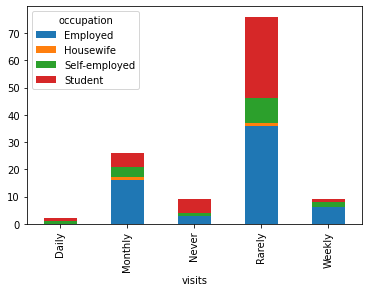

In [16]:
survey.groupby('visits')['occupation'].value_counts().unstack().plot(kind='bar', stacked = True)

Из группировки типа занятости респондентов по частоте посещения Starbucks можно сделать следующие выводы: только 2 человека из выборки ходят туда ежедневно, большинство респондентов ходят туда редко, и почти каждый четвертый в выборке посещает Starbucks раз в месяц.

In [17]:
survey.groupby('nearest')['visits'].value_counts()

nearest        visits 
1km - 3km      Rarely     20
               Monthly     8
               Weekly      4
               Never       2
more than 3km  Rarely     38
               Monthly    14
               Never       5
               Daily       2
               Weekly      2
within 1km     Rarely     18
               Monthly     4
               Weekly      3
               Never       2
Name: visits, dtype: int64

По этой группировке видно, что большая часть респондентов живет далеко от ближайшего Starbucks. Тем не менее, даже в группах 1-3км и до 1км самый популярный ответ о частоте посещения - редко.

In [18]:
survey.groupby('gender')['visits'].value_counts()

gender  visits 
Female  Rarely     45
        Monthly    10
        Never       6
        Weekly      4
Male    Rarely     31
        Monthly    16
        Weekly      5
        Never       3
        Daily       2
Name: visits, dtype: int64

In [19]:
45/65, 10/65, 31/57, 16/57

(0.6923076923076923,
 0.15384615384615385,
 0.543859649122807,
 0.2807017543859649)

В разделении на мужчин и женщин, женщины относительно меньше ходят в Starbucks, чем мужчины: "редко" ответили 69% женщин и 54% мужчин, а "раз в месяц" ответили 15% женщин и 28% мужчин. Возможно, это связано с тем, что среди работающего населения Малайзи, которого в нашей выборке большая часть, больше мужчин.

Попробуем оценить важность факторов Starbucks для респондентов, просуммировав оценки по каждому фактору.

In [20]:
agg_score = {}
agg_score['Качество Starbucks в сравнении с аналогами']= survey.quality.sum()
agg_score['Ценовая политика']= survey.price.sum()
agg_score['Эффективность рекламы']= survey.promoeffect.sum()
agg_score['Атмосфера']= survey.vibe.sum()
agg_score['Качество Wi-Fi']= survey.wifi.sum()
agg_score['Качество сервиса']= survey.service.sum()
score = pd.DataFrame(agg_score.items(), columns=['Фактор','Суммарная оценка'])
score

,Фактор,Суммарная оценка
0,Качество Starbucks в сравнении с аналогами,447
1,Ценовая политика,353
2,Эффективность рекламы,463
3,Атмосфера,458
4,Качество Wi-Fi,397
5,Качество сервиса,457


Самыми высокооцененными факторами Starbucks стали реклама и ее эффект, атмосфера и качество сервиса. Именно эти факторы имеет смысл анализировать в дальнейшем для определения их эффекта на выбор респондентами Starbucks.

# Тестирование гипотез

В этом исследовании будем тестировать гипотезу о том, что для работающих посетителей Starbucks цена кажется более приемлемой, чем для студентов.

Для начала выделим из датасета две выборки - работающие и студенты.

In [21]:
students = survey[survey.occupation == 'Student']['price']
workers = survey[survey.occupation == 'Employed']['price']

Перед тестированием гипотез, проверим две основные предпосылки - нормальное распределение переменной и условие равенства дисперсий.

<AxesSubplot:>

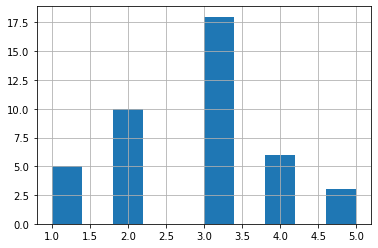

In [22]:
students.hist()

<AxesSubplot:>

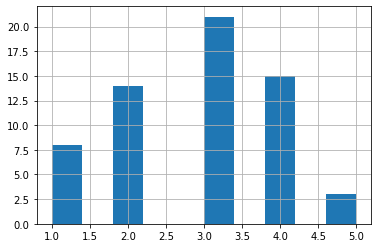

In [23]:
workers.hist()

Распределения студентов и работающих близки к нормальному - гистограммы напоминают колокол Гаусса.

In [24]:
print(students.var())
print(workers.var())

1.133565621370499
1.1945355191256828


Дисперсии двух выборок сопоставимы, а значит, число степеней свободы будет вычисляться по формуле:

$
dofStudent = n1 + n2 - 2
$

In [25]:
dof_student = len(students) + len(workers) - 2
dof_student

101

Возьмем уровень значимость 0.05, тогда для 101 степени свободы:

Критическое значение t = 1.9837

Критическая область (-∞ ; -1.9837) ∪ (1.9837 ; +∞)

In [26]:
def hypothesis_check(t,t_critical):
    
 if abs(t) > t_critical:
    print('Отвергаем H0 - Разница между средними статистически значима')
 else:
    print('Подтверждаем HO')

t_critical = 1.9837

Четко определим наши нулевую и альтернативную гипотезы:

H0: Студенты и работающие одинаково воспринимают цену в Starbucks, и разница между восприятием статистически не значима.

H1: Студенты и работающие по-разному воспринимают цену в Starbucks, и эта разница между восприятием статистически значима.

Найдем t:

In [27]:
v_1 = students.var()/len(students)
v_2 = workers.var()/len(workers)
s_n1_n2 = np.sqrt(v_1 + v_2)
print(s_n1_n2)

0.21580594789194807


In [28]:
t = (students.mean()-workers.mean())/s_n1_n2
print(t)

-0.19895284300102148


Теперь можем протестировать нашу гипотезу:

In [29]:
hypothesis_check(t,t_critical)

Подтверждаем HO


Таким образом, мы подтверждаем нашу нулевую гипотезу о том, что студенты и работающие одинаково воспринимают цену в Starbucks, и разница между восприятием статистически не значима.

Можно сделать вывод, что разница в статуса и доходе не отражается на восприятие ценовой политики Starbucks.

# Линейная регрессия

В исследовании будем использовать модель линейной регрессии для определения влияния различных характеристик Starbucks на выбор респондента провести там деловую или неформальную встречу.

Перед построением линейной регрессии проверим две основные предпосылки - мультиколлинеарность
и релевантность линейной регрессии для описания взаимосвязей.

In [30]:
surveyy = survey.iloc[:, [12, 13, 14, 15, 16, 17, 18]]
surveyy.head()

,quality,price,promoeffect,vibe,wifi,service,choice
0,4,3,5,5,4,4,3
1,4,3,4,4,4,5,2
2,4,3,4,4,4,4,3
3,2,1,4,3,3,3,3
4,3,3,4,2,2,3,3


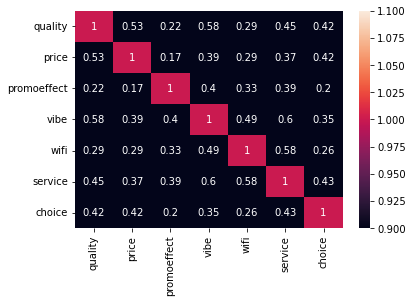

In [31]:
p = sns.heatmap(surveyy.corr(), annot = True, vmin = 1, vmax = 1)

Мы видим, что значимых корреляций между переменными датасета нет. Это говорит о том, что мультиколлинеарности в будущей модели не будет, но вместе с этим мы рискуем получить статистически незначимые коэффициенты. 

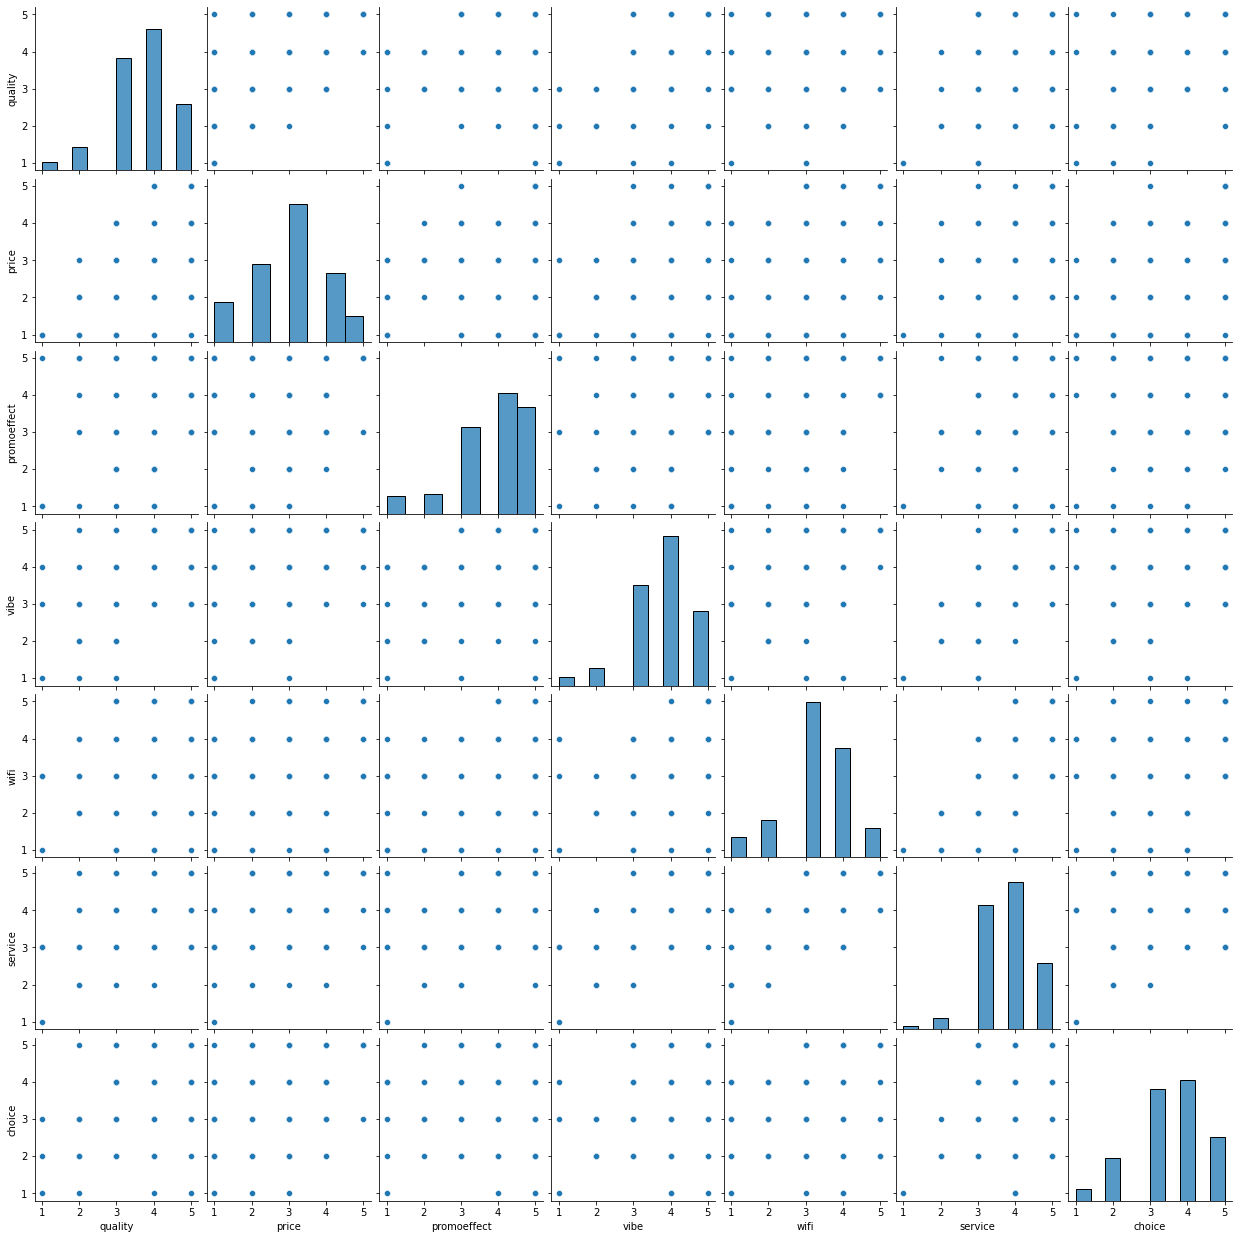

In [32]:
sns.pairplot(surveyy)

Можно увидеть, что некоторым графикам свойствена линия тренда и линейная зависимость может описать
взаимосвязь данных.

Построим линейную модель регрессии - сначала с одной независимой переменной, потом с несколькими.

In [33]:
y = surveyy.choice
X_simple = sm.add_constant(surveyy.service)
model = sm.OLS(y, X_simple)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 choice   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     26.59
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.01e-06
Time:                        15:38:16   Log-Likelihood:                -164.05
No. Observations:                 122   AIC:                             332.1
Df Residuals:                     120   BIC:                             337.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5332      0.394      3.893      0.0

Судя по коэффициентам в модели, они статистически значимы и при повышении оценки респондентами сервиса Starbucks на 1.0, оценка их выбора Starbucks увеличится на 0.5. Тем не менее, коэффициент детерминации R2 равен 0.181, что говорит о низком качестве модели.

Включим в модель линейной регрессии другие независимые переменные.

In [34]:
y = surveyy.choice
X = sm.add_constant(surveyy.drop('choice', axis = 1))
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 choice   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     7.577
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           7.31e-07
Time:                        15:38:16   Log-Likelihood:                -155.94
No. Observations:                 122   AIC:                             325.9
Df Residuals:                     115   BIC:                             345.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9276      0.441      2.105      

Видим, что относительно первой модели эта лучше объясняет взаимосвязи переменных - на 28%, однако коэффициент детерминации в модели все еще низкий.

В модели с несколькими независимыми переменными при уровне значимости 5% статистически значимыми оказались коэффициенты перед переменными цены и сервиса.

Так, при повышении оценки цены респондентом на 1.0, оценка выбора Starbucks повысится на 0.2, а при повышении оценки сервиса на 1.0 - на 0.3.

# Логистическая регрессия

Далее предполагалось создать фиктивную переменную пола респондентов и построить логистическую модель регрессии. 

Для начала удостоверились, что переменная изначально категориальная, затем был применен get_dummies.

In [35]:
survey.gender = survey.gender.astype('category')

In [36]:
pd.get_dummies(survey, columns=['gender'], drop_first = True)

,time,age,occupation,income,visits,takeaway,7. How much time do you normally spend during your visit?,nearest,card,favourite,...,quality,price,promoeffect,vibe,wifi,service,choice,promosource,intent,gender_Male
0,2019/10/01 12:38:43 PM GMT+8,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0
1,2019/10/01 12:38:54 PM GMT+8,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,4,3,4,4,4,5,2,Social Media;In Store displays,Yes,0
2,2019/10/01 12:38:56 PM GMT+8,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,4,3,4,4,4,4,3,In Store displays;Billboards,Yes,1
3,2019/10/01 12:39:08 PM GMT+8,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,2,1,4,3,3,3,3,Through friends and word of mouth,No,0
4,2019/10/01 12:39:20 PM GMT+8,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,...,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes,1
118,2019/10/04 9:30:09 AM GMT+8,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,...,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,1
119,2019/10/04 1:46:07 PM GMT+8,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,...,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No,1
120,2019/10/05 11:01:14 AM GMT+8,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,...,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes,0


Видим, что последний столбец, переменная gender_Male, стала бинарным, фиктивным.

In [37]:
y = survey.choice
X_simple = sm.add_constant(survey.gender)
logit = sm.Logit(y, X_simple)
result = Logit.fit()
print(result.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Но на этапе построения модели логистической регрессии с одной переменной пола, выдается ошибка. Результаты модели так и удалось увидеть, но видна логика построения регрессии.

# Заключение

В заключение исследования поведения и отношения респондентов к Starbucks, можно сделать следующие выводы:
    
* такие характеристики как качество продукции относительно аналогов, реклама и ее эффективность, атмосфера, качество Wi-Fi в кофейнях и сервис респонденты оценили, в среднем на 3.5-3.8 из 5.0


* характеристика цена была оценена, в среднем, на 2.9/5.0, что ниже оценок других факторов, и это логично - цены в Starbucks выше среднего


* 25% или больше респондентов выборки оценили влияние рекламы на их решение о покупке в Starbucks на 5.0/5.0, что объясняется большой ролью бренда и маркетинга в компании Starbucks


* самый популярный способ покупки в выборке - взять с собой


* самое частое время, которое посетители проводят в Starbucks - до 30 минут


* большинство респондентов выборки ходят в Starbucks редко, почти каждый четвертый посещает Starbucks раз в месяц, и только 2 человека из опрошенных ходят туда ежедневно


* независимо от расстояния до ближайшей кофейн - до 1км, 1-3км или больше 3 км, респонденты посещают Starbucks редко


* женщины относительно меньше ходят в Starbucks, чем мужчины - "редко" ответили 69% женщин и 54% мужчин, а "раз в месяц" ответили 15% женщин и 28% мужчин, это может быть связано с тем, что среди работающего населения Малайзи, которого в нашей выборке большая часть, больше мужчин


* cамыми высокооцененными характеристиками Starbucks стали реклама и продвижение, атмосфера и качество сервиса в кофейнях

Также гипотеза о том, что для работающих посетителей Starbucks цена кажется более приемлемой, чем для студентов, соответственно их оценка цены выше, чем у вторых, была ложной.

Тестирование показало, что студенты и работающие одинаково воспринимают цену в Starbucks, и разница между восприятием статистически не значима, на основе чего можем сделать вывод, что разница в статуса и доходе не отражается на восприятие ценовой политики Starbucks.

По результатам оценки модели линейной регрессии можно сделать вывод, при повышении оценки цены респондентом на 1.0, оценка выбора Starbucks повысится на 0.2, а при повышении оценки сервиса на 1.0 - на 0.3.